## Problem Metadata 
DO NOT DELETE. This is a JSON Block. The metadata and course context MUST be in the first cell. 

```json
{
    "problem_title": "rankineReheatCyclePyCalor",
    "author": "tschutzius",
    "year": "Fa25",
    "difficulty_tags": ["easy"],
    "topic": "Power Cycles",
    "lecture_reference": {
        "lecture_id": "1_dm5zknvs",
        "subtopics": [
            {
              "key": "Fa25-L10b-4.0",
              "title": "The ideal reheat Rankine cycle",
            }
        ]
    },
    "book_reference": {
        "chapter_number": 9,
        "title": "Vapor and Combined Power Cycles",
        "sections": [
            "The Ideal Reheat Rankine Cycle"
        ]
    },
    "notes": ""
}

## 1. Problem Statement
The Ideal Reheat Rankine Cycle: Consider a steam power plant operating on the ideal reheat Rankine cycle. Here are the states

- (1) after the condenser, entering the pump;
- (2) after the pump, entering the boiler;
- (3) after the boiler, entering the high pressure turbine;
- (4) after the turbine, entering the boiler again (reheat);
- (5) after the boiler, entering the low pressure turbine;
- (6) after the turbine, entering the condenser.

Steam enters the high-pressure turbine at $p_3$ and $T_3$.

Steam then enters the low-pressure turbine at $p_5$ and $T_5$.

Steam is then condensed in the condeser at a pressure of $p_6$. 

The net power produced by this plant is $W_\text{net}$.

**Goal**: Determine:
- the rate of heat addition and rejection
- the thermal efficiency of this cycle.

## 2. Schematic 
```
+--------------+
|              |
|             (2)
|              |
|              v
|    +-------------------+
|    |                   |
|    |       Boiler      |<----- Heat in (Q_in)
|    |                   |
|    +-------------------+
|              |
|             (3)
|              |
|              v
|    +-------------------+
|    |                   |
|    |  High-p Turbine   |-----> Work out (W_out)
|    |                   |
|    +-------------------+
|              |
|             (4)
|              |
|              v
|    +-------------------+
|    |                   |
|    |       Boiler      |<----- Heat in (Q_in)
|    |                   |
|    +-------------------+
|              |
|             (5)
|              |
|              v
|    +-------------------+
|    |                   |
|    |   Low-p Turbine   |-----> Work out (W_out)
|    |                   |
|    +-------------------+
|              |
|             (6)
|              |
|              v
|    +-------------------+
|    |                   |
|    |     Condenser     |-----> Heat out (Q_out)
|    |                   |
|    +-------------------+
|              |
|             (1)
|              |
|              v
|    +-------------------+
|    |                   |
|    |        Pump       |<----- Work in (W_in)
|    |                   |
|    +-------------------+
|              |
|             (2)
|              |
+ -------------+  
```

## 3. Assumptions and Approximations
### A. General (Cycle-Wide) Assumptions
1.  **Steady-State/Steady-Flow:** For each device in the cycle ($\Delta m_\text{CV}= 0$, $\Delta E_\text{CV}= 0$, $\Delta S_\text{CV}= 0$).
2.  **Overall Energy:** All changes in **Kinetic Energy ($\Delta KE$) and Potential Energy ($\Delta PE$)** are negligible between components, except where explicitly calculated (e.g., for a nozzle or diffuser).
3.  ***Property Model and Analysis Method:*** 
    * **Property tables: `pyCalor` (Accurate):**
        * **Purpose:** Must be used for determining water properties. 
        * **Tools:** Properties ($h$, $s$, $T$, and $p$) are retrieved directly from a **thermodynamic property library** (e.g., **`pyCalor`**). Since it is a pure substance we only need to know two independent properties.

---

### B. Component-Specific Assumptions

1.  **Conservation of Mass:** For all devices operating at steady-flow, the mass entering is equal to the mass exiting: **$\dot{m}_{\text{in}} = \dot{m}_{\text{out}}$**).
2.  **Conservation of Energy (First Law):** The **Steady-Flow Energy Equation** is applied to determine work and heat transfer.
3.  **Entropy Balance (Second Law):** The **Entropy Balance for a Control Volume Equation** is applied to determine changes in entropy.

#### 1-2. Pump
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_P$)**.

#### 2-3. Boiler
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 3-4. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 4-5. Boiler
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

#### 5-6. Turbine
* **Adiabatic:** $\dot{Q}=0$.
* **Ideal Process:** The ideal process is **Isentropic** ($s_{\text{in}} = s_{\text{out}}$).
* **Actual Process:** The actual work is determined by a specified **Isentropic Efficiency ($\eta_T$)**.

#### 6-1. Condenser
* Idealized as a **Heat Exchanger** rejecting heat out of the cycle
* **Isobaric:** $\Delta p=0$ (constant pressure heat addition).
* **No Shaft Work:** $\dot{W}=0$.

## 4. Physical Laws
### Control Volumes:
1.  **First Law of Thermodynamics (Energy Balance for Control Volume):**
    $$\frac{dE_\text{CV}}{dt} = \dot{E}_\text{in} - \dot{E}_\text{out}$$

2.  **Conservation of Mass (Mass Balance for a Control Volume):**
    $$\frac{dm_\text{CV}}{dt} = \dot{m}_\text{in} - \dot{m}_\text{out}$$
    
3.  **Entropy Balance (Second Law for a Control Volume):**
    $$\frac{dS_\text{CV}}{dt} = \dot{S}_\text{in} - \dot{S}_\text{out} + \dot{S}_\text{gen}$$

### Steady-Flow Analysis
Since each devices operates as a **Steady-Flow** device we can write: 

**Mass Balance:**
$$\dot{m}_\text{in} = \dot{m}_\text{out} = \dot{m}$$

**Energy Balance:**
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} + \frac{w_\text{in}^2}{2} + g z_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} + \frac{w_\text{out}^2}{2} + g z_\text{out} \right)$$

Neglecting kinetic and potential energy effects:
$$\dot{W}_\text{in} + \dot{Q}_\text{in} + \dot{m} \left(h_\text{in} \right) = \dot{W}_\text{out} + \dot{Q}_\text{out} + \dot{m} \left(h_\text{out} \right)$$

**Entropy Balance:**
$$\dot{S}_\text{gen} = \dot{S}_\text{out} - \dot{S}_\text{in}$$

Assuming that the process is adiabatic and reversible (isentropic), we have:
$$\dot{S}_\text{out} = \dot{S}_\text{in}$$

and

$$\dot{m}_\text{out}s_\text{out} = \dot{m}_\text{in}s_\text{in}$$

Therefore,

$$s_\text{in} = s_\text{out}$$

### Device Governing Equations (First Law)
We can write our steady-flow energy equation for each device by applying the appropriate **Assumptions and Approximations** listed above.

For the pump (1-2):
$$\dot{W}_\text{in} =  \dot{m} \left(h_\text{2a} - h_1\right)$$

For the boiler (2-3):
$$\dot{Q}_\text{in,23} = \dot{m} \left(h_3 - h_\text{2a} \right)$$

For the turbine (3-4):
$$\dot{W}_\text{out,34} = \dot{m} \left(h_3 - h_\text{4a} \right)$$

For the boiler (4-5):
$$\dot{Q}_\text{in,45} = \dot{m} \left(h_5 - h_\text{4a} \right)$$

For the turbine (5-6):
$$\dot{W}_\text{out,56} = \dot{m} \left(h_5 - h_\text{6a} \right)$$

For the condenser (6-1):
$$\dot{Q}_\text{out} = \dot{m} \left(h_\text{6a} - h_1 \right)$$

### Isentropic Efficiency (Linking Actual and Ideal States)

The efficiency definitions are used to determine the actual exit enthalpies ($h_{2a}$ and $h_{4a}$):

**Pump Isentropic Efficiency:**
$$\eta_\text{pump} = \frac{\text{Isentropic pump work}}{\text{Actual pump work}} = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

**Turbine Isentropic Efficiency:**
$$\eta_\text{turbine} = \frac{\text{Actual turbine work}}{\text{Isentropic turbine work}} = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

In [8]:
# 5. Properties (Code Cell)
!pip install pyCalor
from pyCalor import thermo as th

Wnet_kW = 5000
substance = 'water'

# state 3
T3_C = 315.5556 # 600 F
p3_MPa = 41.36854/10 # 600 psia
T3_K = T3_C + 273.15

# state 5
T5_C = T3_C # 600 F
p5_MPa = 13.78951/10 # 200 psia
T5_K = T5_C + 273.15

# state 6
p6_kPa = (0.6894757/10)*1000 # 10 psia
p6_MPa = p6_kPa/1000


# condenser:
p1_MPa = p6_MPa

# boiler:
p2_MPa = p3_MPa

# state 1
x1 = 0
P1 = p1_MPa
st1 = th.state(substance,p=(P1,'Mpa'),x=x1,name='1')
T1 = st1.T # K
s1 = st1.s # kJ/kg*K
h1 = st1.h # kJ/kg
v1 = st1.v # m3/kg

# state 2
P2 = p2_MPa        # MPa
s2 = s1            # kJ/kg*K
st2 = th.state(substance,p=(P2,'Mpa'),s=s2,name='2')
T2 = st2.T # K
h2 = st2.h # kJ/kg

# state 3
T3 = T3_K # K
P3 = P2 # definition of isobaric, MPa
st3 = th.state(substance,p=(P3,'Mpa'),T=(T3,'K'),name='3')
h3 = st3.h # kJ/kg
s3 = st3.s # kJ/kg*K

# state 4
s4 = s3 # isentropic #kJ/kg*K
p4_MPa = p5_MPa
P4 = p4_MPa # MPa
st4 = th.state(substance,p=(P4,'Mpa'),s=(s4,'kJ/kg K'),name='4')
T4 = st4.T # K
h4 = st4.h # kJ/kg
x4 = st4.x

# state 5
P5 = p5_MPa
T5 = T5_K
st5 = th.state(substance,p=(P5,'Mpa'),T=(T5,'K'),name='5')
h5 = st5.h # kJ/kg
s5 = st5.s # kJ/kg*K

# state 6
s6 = s5
P6 = p6_MPa
st6 = th.state(substance,p=(P6,'Mpa'),s=(s6,'kJ/kg K'),name='6')
h6 = st6.h
x6 = st6.x
T6 = st6.T

The condenser heat duty is 2116.01 kJ/kg
The boiler heat duty is: 2934.64 kJ/kg
The mass flow rate is: 6.11 kg/s
(a) The boiler heat duty is: 17924.18 kW
(a) The condenser heat duty is 12924.18 kW
(b) The overall efficiency is 27.90%.


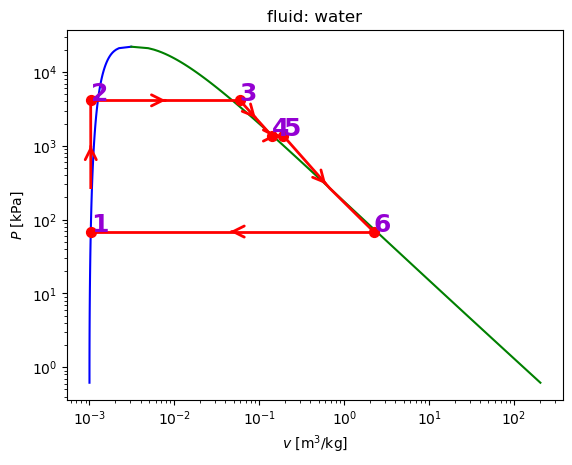

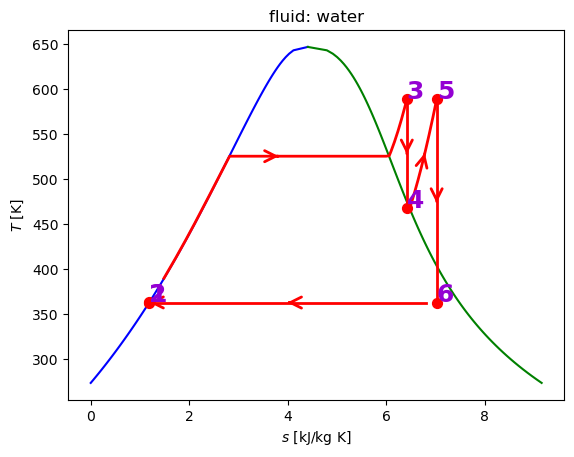

In [10]:
# 6 Calculations (Code Cell)
Qc = h6 - h1 # Cooling from T6 to T1, kJ/kg
print('The condenser heat duty is {0:1.2f} kJ/kg'.format(Qc))

Qb = (h3 - h2)+(h5 - h4) # heat required to make the steam, kJ/kg
print('The boiler heat duty is: {0:1.2f} kJ/kg'.format(Qb))

w34_out = (h3 - h4)
w56_out = (h5 - h6)
w12_in = (h2 - h1)

wnet = w34_out + w56_out - w12_in

mdot_kgPerS = Wnet_kW / wnet
print('The mass flow rate is: {0:1.2f} kg/s'.format(mdot_kgPerS))

Qin_kW = mdot_kgPerS*Qb
print('(a) The boiler heat duty is: {0:1.2f} kW'.format(Qin_kW))

Qout_kW = mdot_kgPerS*Qc
print('(a) The condenser heat duty is {0:1.2f} kW'.format(Qout_kW))

eta = Wnet_kW / Qin_kW
print('(b) The overall efficiency is {0:1.2%}.'.format(eta))

pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st5),(st5,st6),(st6,st1)])
fig1 = pr.plot('pv');
fig2 = pr.plot('Ts');

## 7. Summary and Reasoning
We have analyzed the ideal reheat Rankine cycle, which is an important cycle for modeling the steam power plant. By performing reheat, we increase the temperature where we are transferring heat into the cycle, therefore improving the efficiency. 

In [ ]:
THIS SHOULD BE THE FINAL CELL, DO NOT ADD OTHERS AFTER THIS, EVEN IF THEY'RE EMPTY
--- End of the Jupyter Notebook ---